# <p style="text-align:center;"> Decision Trees using Sk-Learn</p>
---
*<p style="text-align:right;">Reference: Machine Learning by Andrew Ng, Sci-kit Learn.</p>*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

## Assumptions for Logistic Regression
- **Appropriate Outcome Type** : It assumes that there is an appropriate structure of the output label. So the type of logistic regression utilized (binary, multinomial, or ordinal) must match the outcome (dependent) variable in the dataset.

- **Absence of multi-collinearity** : Multicollinearity corresponds to a situation where the data contain highly correlated independent variables. This is a problem because it reduces the precision of the estimated coefficients, which weakens the statistical power of the logistic regression model.

- **Independence of observations** : The observations must be independent of each other, i.e., they should not come from repeated or paired data. This means that each observation is not influenced by or related to the rest of the observations.

- **Sufficiently large sample size** : There should be an adequate number of observations for each independent variable in the dataset to avoid creating an overfit model. One rule of thumb is that there should be at least 10 observations with the least frequent outcome for each independent variable. We can check this by retrieving the `value_counts` for each variable.

- **Linearity of independent variables and log-odds** : Logistic regression does not require a linear relationship between the dependent and independent variables. However, it still needs independent variables to be linearly related to the log-odds of the outcome.


## The UCI ML Wine Dataset

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

- Number of Instances : 178 (50 in each of three classes)

- Number of Attributes : 13 numeric, predictive attributes and the class

- Attribute Information
    * Alcohol
    * Malic acid
    * Ash
    * Alcalinity of ash
    * Magnesium
    * Total phenols
    * Flavanoids
    * Nonflavanoid phenols
    * Proanthocyanins
    * Color intensity
    * Hue
    * OD280/OD315 of diluted wines
    * Proline


- Class
    * class_0
    * class_1
    * class_2

In [3]:
X,y = datasets.load_wine(return_X_y = True, as_frame = True)

## Visualization

In [4]:
df = pd.concat([X,y], axis = 1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [6]:
print("Shape of X: " + str(X.shape))
print("Shape of Y: " + str(y.shape))

Shape of X: (178, 13)
Shape of Y: (178,)


### Target Column Distribution

In [7]:
df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

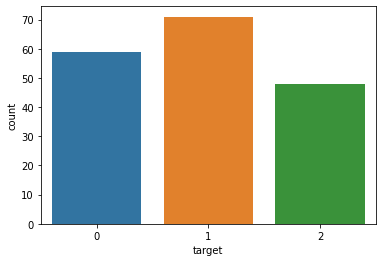

In [8]:
sns.countplot(x = 'target', data = df)

In [9]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Outlier features are alcalinity_of_ash, magnesium, color_intensityand proline which've been deduced upon comparing mean and max value of the features. Now we will plot the correlation matrix heatmap. While constructing the correlation matrix a thing that we can do is to include the dependent variable ‘SalePrice’ here as well. This is because it is a method for us when we try to select the independent variables to be included in the model. When clueless about which variables to include in the model, just do a correlation matrix and select those independent variables with high correlation with dependent variable. But the target variable here is class/discrete output not continuous. Hence its no use to include the target variable.

In [10]:
np.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [12]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0


In [13]:
y_train.head()

138    2
104    1
78     1
36     0
93     1
Name: target, dtype: int32

In [14]:
#drop ensures old idx wont be included in dataset, 
#inplace modifies the org. dataframe, doesnt generates new copy instead
X_train.reset_index(drop = True, inplace = True); 
y_train.reset_index(drop = True, inplace = True);
X_test.reset_index(drop = True, inplace = True);
y_test.reset_index(drop = True, inplace = True);

In [15]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
1,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
2,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
3,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
4,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
120,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
121,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
122,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [16]:
y_train

0      2
1      1
2      1
3      0
4      1
      ..
119    1
120    1
121    0
122    1
123    1
Name: target, Length: 124, dtype: int32

In [17]:
print("Shape of X_train:", X_train.shape, "Shape of y_train: ", y_train.shape)
print("Shape of X_test:", X_test.shape, "Shape of y_test: ", y_test.shape)

Shape of X_train: (124, 13) Shape of y_train:  (124,)
Shape of X_test: (54, 13) Shape of y_test:  (54,)


### Boxplots

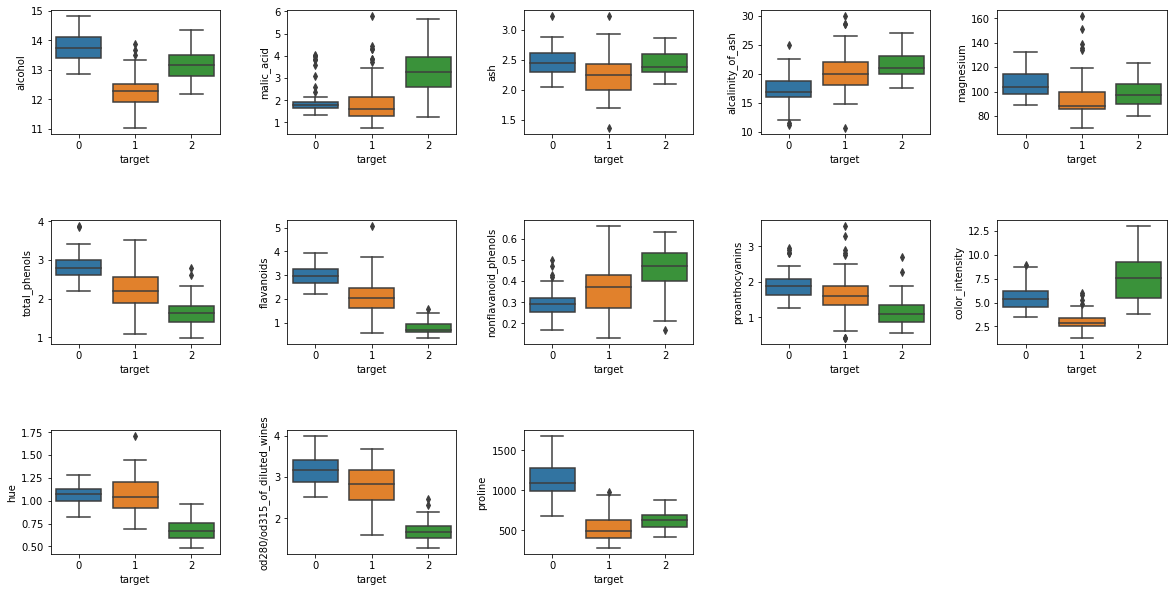

In [18]:
plt.figure(figsize = (20,10))
for i in range(len(X_train.columns)):
     plt.subplot(3, 5, i+1)
     sns.boxplot(x = 'target', y = X_train.columns[i], data = df)
plt.subplots_adjust(hspace=0.7, wspace=0.4)

For the alcohol feature - 
- Min vlaue of Dataset lies in  Class 1 is somewhere around 11
- Max vlaue of Dataset lies in  Class 0 is somewhere below 15

which can be also inferred from:

In [19]:
df['alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

### Distribution Plots

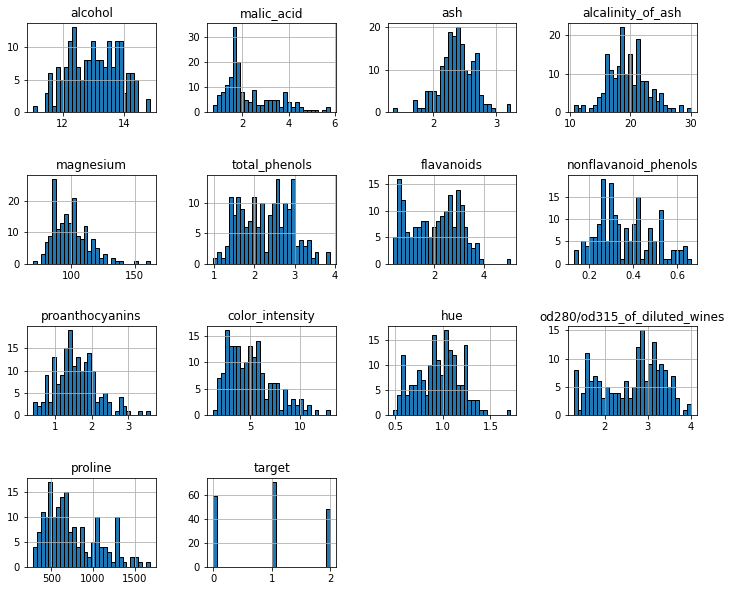

In [20]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

The skewness and kurtosis of all variables are:

In [21]:
sk = pd.DataFrame()
for i in range(len(X_train.columns)):
    sk.at[i, 'Feature'] = X_train.columns[i]
    sk.at[i, 'Skewness'] = np.round(df[df.columns[i]].skew(), 2)
    sk.at[i, 'Kurtosis'] = np.round(df[df.columns[i]].kurt(), 2)

In [22]:
sk

,Feature,Skewness,Kurtosis
0,alcohol,-0.05,-0.85
1,malic_acid,1.04,0.30
2,ash,-0.18,1.14
3,alcalinity_of_ash,0.21,0.49
4,magnesium,1.10,2.10
5,total_phenols,0.09,-0.84
6,flavanoids,0.03,-0.88
7,nonflavanoid_phenols,0.45,-0.64
8,proanthocyanins,0.52,0.55
9,color_intensity,0.87,0.38


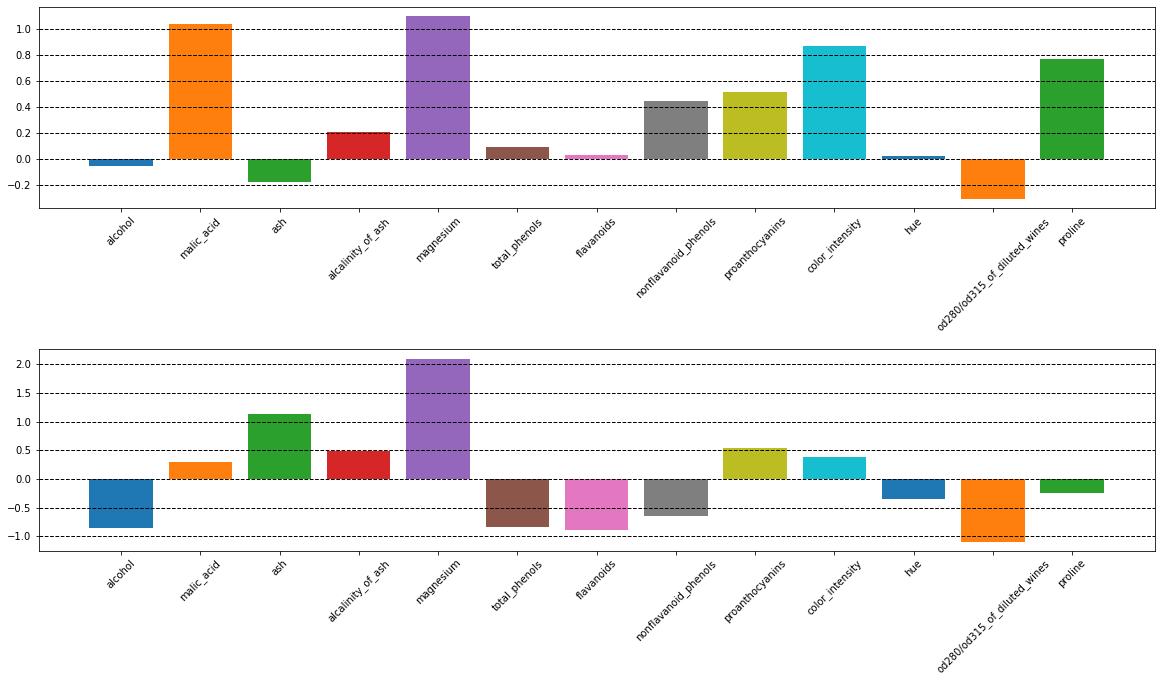

In [23]:
plt.figure(figsize = (20,10))

plt.subplot(2,1,1)
for i in range(len(sk)):
    plt.bar(x = sk.at[i,'Feature'], height = sk.at[i, 'Skewness'])
    plt.xticks(rotation = 45)
plt.grid(axis = 'y', c = 'k', ls = '--', lw = 1)

plt.subplot(2,1,2)
for i in range(len(sk)):
    plt.bar(x = sk.at[i,'Feature'], height = sk.at[i, 'Kurtosis'])
    plt.xticks(rotation = 45)
plt.grid(axis = 'y', c = 'k', ls = '--', lw = 1)

plt.subplots_adjust(hspace = 0.7)

## Feature Engineering

<AxesSubplot:>

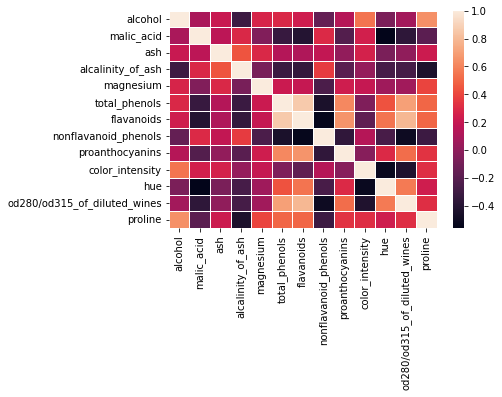

In [24]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = False, linewidth = .5)

In [25]:
correlation_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [26]:
cm = correlation_matrix.ge(0.6)
cm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,True,False,False,False,False,False,False,False,False,False,False,False,True
malic_acid,False,True,False,False,False,False,False,False,False,False,False,False,False
ash,False,False,True,False,False,False,False,False,False,False,False,False,False
alcalinity_of_ash,False,False,False,True,False,False,False,False,False,False,False,False,False
magnesium,False,False,False,False,True,False,False,False,False,False,False,False,False
total_phenols,False,False,False,False,False,True,True,False,True,False,False,True,False
flavanoids,False,False,False,False,False,True,True,False,True,False,False,True,False
nonflavanoid_phenols,False,False,False,False,False,False,False,True,False,False,False,False,False
proanthocyanins,False,False,False,False,False,True,True,False,True,False,False,False,False
color_intensity,False,False,False,False,False,False,False,False,False,True,False,False,False


Features that have collinearity>0.6 are as below:

In [27]:
cf = pd.DataFrame()
for i in range(len(cm.index)):
    for j in range(len(cm.columns)):
        if( (cm.at[ cm.index[i] , cm.columns[j] ]==True) & (cm.index[i]!=cm.columns[j]) ):
            cf.at[i, 'Feature_1'] = cm.index[i]
            cf.at[i, 'Feature_2'] = cm.columns[j]
            cf.at[i, 'Correlation'] = np.round(correlation_matrix.at[cm.index[i] , cm.columns[j]],2)

In [28]:
cf

,Feature_1,Feature_2,Correlation
0,alcohol,proline,0.64
5,total_phenols,od280/od315_of_diluted_wines,0.70
6,flavanoids,od280/od315_of_diluted_wines,0.79
8,proanthocyanins,flavanoids,0.65
11,od280/od315_of_diluted_wines,flavanoids,0.79
12,proline,alcohol,0.64


We can drop the 'total_phenol' feature since its correlated to 3 other features. Similarly we can drop 'flavanoids' feature as well. We can also see the variance inflation factor of the independent variables to select the necessary features. 

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. 

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,alcohol,206.189057
1,malic_acid,8.925541
2,ash,165.640370
3,alcalinity_of_ash,73.141564
4,magnesium,67.364868
5,total_phenols,62.786935
6,flavanoids,35.535602
7,nonflavanoid_phenols,16.636708
8,proanthocyanins,17.115665
9,color_intensity,17.022272


If the VIF value is higher than 10, it is usually considered to have a high correlation with other independent variables. However, the acceptance range is subject to requirements and constraints. From the results, we can see that most features are highly correlated with other independent variables and only 1 feature, 'malic_acid' can pass the below 10 threshold.

In [30]:
X_train = X_train.drop(['total_phenols','flavanoids' ], axis = 1)

In [31]:
X_test = X_test.drop(['total_phenols','flavanoids' ], axis = 1)

In [32]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.49,3.59,2.19,19.5,88.0,0.58,0.88,5.70,0.81,1.82,580.0
1,12.51,1.73,1.98,20.5,85.0,0.32,1.48,2.94,1.04,3.57,672.0
2,12.33,0.99,1.95,14.8,136.0,0.35,2.76,3.40,1.06,2.31,750.0


Constructing the VIF Table again after deleting the features we get:

In [33]:
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["vif_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,features,vif_Factor
0,alcohol,176.055840
1,malic_acid,10.367581
2,ash,154.003676
3,alcalinity_of_ash,64.816107
4,magnesium,59.490240
5,nonflavanoid_phenols,14.725340
6,proanthocyanins,14.726721
7,color_intensity,17.555055
8,hue,43.325719
9,od280/od315_of_diluted_wines,36.782769


We can see that using simple elimination, we are able to reduce the VIF value significantly while keeping the important variables. However, the variables still have high VIF value and they are important in predicting housing price. How? Sometimes we can use small tricks as described below to transform the variable.

In [34]:
print("Min , Max of ash: ", X_train['ash'].min(), " , " , X_train['ash'].max())
print("Min , Max of alcalinity_of_ash: ", X_train['alcalinity_of_ash'].min(), " , " , X_train['alcalinity_of_ash'].max())

Min , Max of ash:  1.36  ,  3.23
Min , Max of alcalinity_of_ash:  10.6  ,  30.0


Either we can transform these variables seperately or combine them to a single variable.

*Modifying Train Data* : 

In [35]:
ash_train = pd.Series(np.abs(X_train['alcalinity_of_ash'] - X_train['ash']))
ash_train[0:3]

0    17.31
1    18.52
2    12.85
dtype: float64

In [36]:
X_train['ash_alk'] = ash_train
X_train = X_train.drop(['ash','alcalinity_of_ash'], axis = 1)
X_train.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk
0,13.49,3.59,88.0,0.58,0.88,5.70,0.81,1.82,580.0,17.31
1,12.51,1.73,85.0,0.32,1.48,2.94,1.04,3.57,672.0,18.52
2,12.33,0.99,136.0,0.35,2.76,3.40,1.06,2.31,750.0,12.85


In [37]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [38]:
df_train.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk,target
0,13.49,3.59,88.0,0.58,0.88,5.70,0.81,1.82,580.0,17.31,2
1,12.51,1.73,85.0,0.32,1.48,2.94,1.04,3.57,672.0,18.52,1
2,12.33,0.99,136.0,0.35,2.76,3.40,1.06,2.31,750.0,12.85,1


*Modifying Test Data :*

In [39]:
ash_test = pd.Series(np.abs(X_test['alcalinity_of_ash'] - X_test['ash']))
ash_test[0:3]

0    12.64
1    16.46
2    18.30
dtype: float64

In [40]:
X_test['ash_alk'] = ash_test
X_test = X_test.drop(['ash','alcalinity_of_ash'], axis = 1)
X_test.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk
0,13.64,3.10,116.0,0.17,1.66,5.10,0.96,3.36,845.0,12.64
1,14.21,4.04,111.0,0.30,1.25,5.24,0.87,3.33,1080.0,16.46
2,12.93,2.81,96.0,0.53,0.75,4.60,0.77,2.31,600.0,18.30


In [41]:
df_test = pd.concat([X_test, y_test], axis = 1)

In [42]:
df_test.head(3)

,alcohol,malic_acid,magnesium,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,ash_alk,target
0,13.64,3.10,116.0,0.17,1.66,5.10,0.96,3.36,845.0,12.64,0
1,14.21,4.04,111.0,0.30,1.25,5.24,0.87,3.33,1080.0,16.46,0
2,12.93,2.81,96.0,0.53,0.75,4.60,0.77,2.31,600.0,18.30,2


<AxesSubplot:>

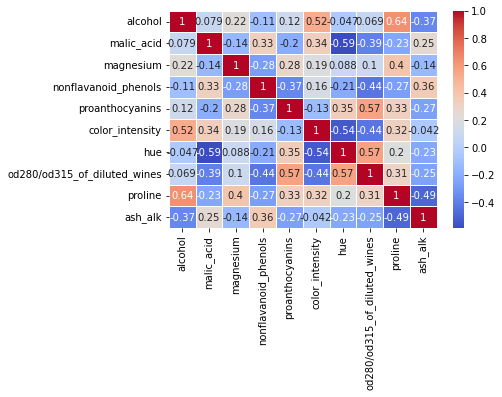

In [43]:
cm_train = X_train.corr()
sns.heatmap(cm_train, annot = True, lw = 0.5, cmap = 'coolwarm')

In [44]:
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["vif_Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

,features,vif_Factor
0,alcohol,172.233913
1,malic_acid,10.268520
2,magnesium,54.585024
3,nonflavanoid_phenols,13.996128
4,proanthocyanins,14.326509
5,color_intensity,17.104018
6,hue,43.056292
7,od280/od315_of_diluted_wines,34.208976
8,proline,16.241076
9,ash_alk,35.953839


Initially 'ash' and 'alcalinity_of_ash' had VIF 154 and 64.81. Now the combined feature ash_alk has a reduced $ VIF \approx 36 $

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train_transformed = scaler.fit_transform(X_train)

---
## Using Sk-Learn


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. The deeper the tree, the more complex the decision rules and the fitter the model. Scikit-learn uses an optimized version of the CART algorithm; however, the scikit-learn implementation does not support categorical variables for now. 

`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset.

As with other classifiers, `DecisionTreeClassifier` takes as input two arrays: an array `X`, sparse or dense, of shape (`n_samples`, `n_features`) holding the training samples, and an array `Y` of integer values, shape (`n_samples`,), holding the class labels for the training samples:




In [48]:
from sklearn import tree

### Decision Tree Model Fitting

The `DecisionTreeClassifier` takes the following arguments - 
- `criterion` : {'gini','entropy'}, default = 'gini' :: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy”
- `splitter` : {'random','best'}, default = 'best' :: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- `max_depth` : {int, 'None'}, default = 'None' :: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- `min_samples_split` : {int or float}, default = 2 :: The minimum number of samples required to split an internal node
- `min_samples_leaf` : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


In [49]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', min_samples_leaf = 5)
clf = clf.fit(X_train,y_train)

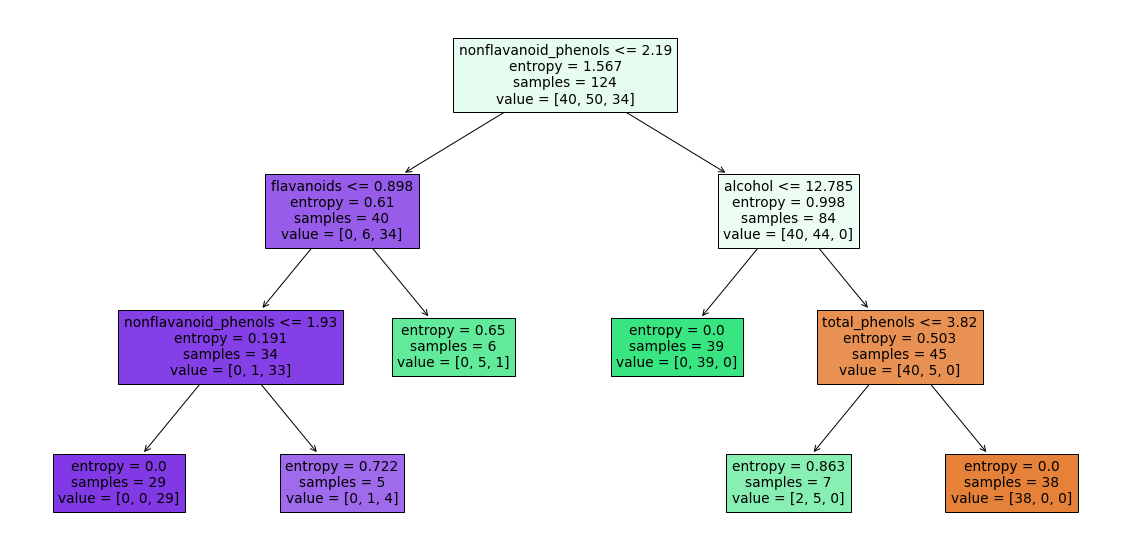

In [50]:
plt.figure(figsize = (20,10))
tree.plot_tree(clf, filled = True, feature_names = X.columns)
plt.show()

In [51]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Model Prediction

In [52]:
y_pred = clf.predict(X_test)

### Model Evaluation

In [53]:
from sklearn.metrics import multilabel_confusion_matrix

In [54]:
mcm = multilabel_confusion_matrix(y_pred, y_test)

#### Accuracy, Precision, Recall, F1-Score
$$
Accuracy =  \frac {TP +TN}{TP + TN + FP + FN} \ \ \ \ Precision = \frac {TP}{TP + FP} \\ 
Recall = \frac {TP}{TP + FN} \ \ \ \ F_1 Score = \frac {2\cdot Precision \cdot Recall} {Precision + Recall}\\
Specificity = \frac{TN}{TN + FP}
$$ 

In [55]:
def aprf(cm):
    df = pd.DataFrame(cm)
    TP = df.at[0,0]
    FP = df.at[0,1]
    FN = df.at[1,0]
    TN = df.at[1,1]
    
    accuracy =  (TP + TN)/(TP + FP + FN + TN)
    precision = (TP)/(TP + FP)
    recall = (TP)/(TP + FN)
    f1score = (2*precision*recall)/(precision + recall)
    
    spec = TN/(TN + FP)
    d = {'Metrics':[accuracy, precision, recall, f1score, spec]}
    results = pd.DataFrame(data = d, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score',  'Specificity'])
    
    return results

In [56]:
results_test_0 = aprf(mcm[0])
results_test_1 = aprf(mcm[1])
results_test_2 = aprf(mcm[2])

In [57]:
results_test_0 

,Metrics
Accuracy,0.888889
Precision,0.939394
Recall,0.885714
F1-Score,0.911765
Specificity,0.894737


In [58]:
results_test_1

,Metrics
Accuracy,0.888889
Precision,0.909091
Recall,0.909091
F1-Score,0.909091
Specificity,0.857143


In [59]:
results_test_2

,Metrics
Accuracy,0.925926
Precision,0.928571
Recall,0.975000
F1-Score,0.951220
Specificity,0.785714


## ROC Curve

In order to extend ROC curve and ROC area to multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging). The difference between macro and micro averaging is that macro weighs each class equally whereas micro weighs each sample equally. If you have an equal number of samples for each class, then macro and micro will result in the same score.

Another evaluation measure for multi-label classification is macro-averaging, which gives equal weight to the classification of each label.

In [60]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(54, 3)

In [61]:
y_score = clf.predict_proba(X_test)

### For class 0

In [62]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

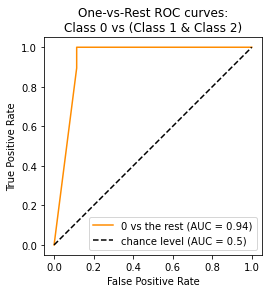

In [63]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClass 0 vs (Class 1 & Class 2)")
plt.legend()
plt.show()

### For Class 1

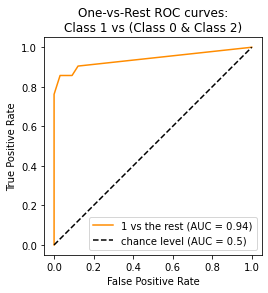

In [64]:
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClass 1 vs (Class 0 & Class 2)")
plt.legend()
plt.show()


### For Class 2

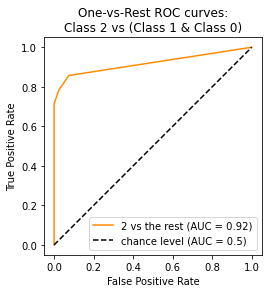

In [65]:
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nClass 2 vs (Class 1 & Class 0)")
plt.legend()
plt.show()


### Random Forest Classifier

A random forest is a tree ensemble method that works better than single decision tree. A specific instance of tree ensemble is called a bagged decision tree and that refers to putting our training examples in a virtual bag (sampling w/ replacement). A modification that makes it work better than single decision tree is that 
> <i>At each node, when chosing a fetaure to use to split, if 'n' features are available, pick a random subset of 'k<n' featuresand allow the algorithm to only chose from that subset of features</i>

Generally, we take $k=\sqrt n$

Two families of ensemble methods are usually distinguished:

- In averaging methods, the driving principle is to build several estimators(trees) independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

Examples: Bagging methods, Forests of randomized trees, …

- By contrast, in boosting methods, base estimators(trees) are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

Examples: AdaBoost, Gradient Tree Boosting, …

As other classifiers, forest classifiers have to be fitted with two arrays: a sparse or dense array `X` of shape (`n_samples`, `n_features`) holding the training samples, and an array `Y` of shape (`n_samples`,) holding the target values (class labels) for the training samples. Like decision trees, forests of trees also extend to multi-output problems (if Y is an array of shape (`n_samples`, `n_outputs`)).


In [66]:
from sklearn.ensemble import RandomForestClassifier

- In random forests (`RandomForestClassifier` and `RandomForestRegressor` classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

- Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`.

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

The scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

The main parameters to adjust when using these methods is `n_estimators` and `max_features`. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. 

In [74]:
clf = RandomForestClassifier(n_estimators = 10, max_features = 'sqrt')
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [76]:
y_pred = clf.predict(X_test)

In [78]:
mcm = multilabel_confusion_matrix(y_pred, y_test)

In [79]:
results_test_0 = aprf(mcm[0])
results_test_1 = aprf(mcm[1])
results_test_2 = aprf(mcm[2])

In [80]:
results_test_0

,Metrics
Accuracy,1.0
Precision,1.0
Recall,1.0
F1-Score,1.0
Specificity,1.0


In [81]:
results_test_1

,Metrics
Accuracy,0.981481
Precision,1.000000
Recall,0.969697
F1-Score,0.984615
Specificity,1.000000


In [82]:
results_test_2

,Metrics
Accuracy,0.981481
Precision,0.975610
Recall,1.000000
F1-Score,0.987654
Specificity,0.928571


### Gradient Boosted Trees